Avaliação - Unidade 02
===

Identificação dos alunos (nome completo): 

- Este trabalho irá compor 40% da segunda unidade.
- Grupo de até dois alunos.
- Os alunos deverão enviar (apenas um por grupo) através do Sigaa, o notebook e os datasets gerados na avaliação em um arquivo compactado (.zip). 
- Todas as respostas devem ser realizadas através de código python e os resultados explicados em estilo markdown
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino


1. (1 ponto) Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1? 
**Dica:** 
>```python
df[df['A'].str.contains("hello")]
```
2. (3 pontos) Realize um estudo envolvendo as propriedades de **assimétria** e **curtose** para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados. 
3. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções **facetgrid** e **map**) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos. 
4. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição. 

In [1]:
import pandas as pd
import numpy as np
turmas = pd.read_csv('turmas-2017.1.csv',sep=';')
turmas_imd = turmas[turmas['codigo'].str.contains('IMD')]
##1
turmas_imd_cons = turmas_imd[turmas_imd['situacao_turma'].str.contains('CONSOLIDADA')]
turmas_imd_cons = turmas_imd_cons[~turmas_imd_cons.duplicated('id_turma')]
print('1. Foram consolidadas ' + str(len(turmas_imd_cons)) + ' turmas:')
print(turmas_imd_cons['codigo'].unique())

1. Foram consolidadas 93 turmas:
['IMD0019' 'IMD0017' 'IMD0018' 'IMD0020' 'IMD0012.0' 'IMD0012.1' 'IMD0024'
 'IMD0027' 'IMD0028' 'IMD0034' 'IMD0029' 'IMD0030' 'IMD0033' 'IMD0038'
 'IMD0039' 'IMD0040' 'IMD0041' 'IMD0105' 'IMD0308' 'IMD0319' 'IMD0322'
 'IMD0323' 'IMD0324' 'IMD0328' 'IMD0403' 'IMD0405' 'IMD0408' 'IMD0409'
 'IMD0414' 'IMD0415' 'IMD0423' 'IMD0505' 'IMD0506' 'IMD0512' 'IMD0517'
 'IMD0524' 'IMD0701' 'IMD0705' 'IMD0822' 'IMD0521' 'IMD0043' 'IMD0110'
 'IMD0709' 'IMD0725' 'IMD0271' 'IMD0707' 'IMD0708' 'IMD0086' 'IMD0081'
 'IMD0079' 'IMD0090' 'IMD0082']


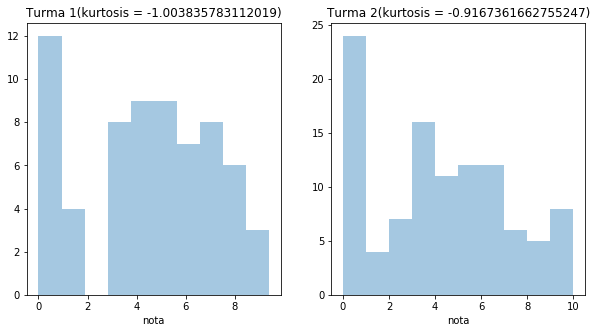

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
#Assimetria
from scipy.stats import skew
#Curtose
from scipy.stats import kurtosis

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, nrows=1)

probabilidade = turmas_imd_cons[turmas_imd_cons['codigo'].str.contains("IMD0033")]
id_probabilidade = list(probabilidade['id_turma'])

matricula_comp_id_turma1 = matricula_comp[matricula_comp['id_turma'] == id_probabilidade[0]]
matricula_comp_id_turma2 = matricula_comp[matricula_comp['id_turma'] == id_probabilidade[1]]

turma1 = matricula_comp_id_turma1.dropna()
turma2 = matricula_comp_id_turma2.dropna()

assimetria_turma1 = skew(turma1['nota'])
curtose_turma1 = kurtosis(turma1['nota'])
assimetria_turma2 = skew(turma2['nota'])
curtose_turma2 = kurtosis(turma2['nota'])

### Titles of subplots
ax1.set_title("Turma 1(kurtosis = " + str(curtose_turma1) + ")", fontsize=12)
ax2.set_title("Turma 2(kurtosis = " + str(curtose_turma2) + ")", fontsize=12)

sns.distplot(turma1['nota'], kde = False, ax=ax1, bins=10)
sns.distplot(turma2['nota'], kde = False, ax=ax2, bins=10)

plt.show()